## Stock Price Prediction Using Machine Learning Models

In [1]:
# import necessary libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, LSTM
from keras.optimizers import RMSprop
from keras.layers import SimpleRNN


import math
import pandas as pd

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns


## Dataset and EDA

### Import Dataset

In [2]:
file_path = "dataA.csv"
# read csv file from data.csv file
nepse_df = pd.read_csv(file_path, header = 0)

In [3]:
# Check the data in the top of the dataframe
nepse_df.head()

,Symbol,Date,Open,High,Low,Close,percent_change,Volume
0,LBBL,7/15/2022,340.1,347.7,337.0,341.0,-0.87,21063
1,LBBL,7/14/2022,344.0,350.0,332.0,344.0,1.78,52442
2,LBBL,7/13/2022,321.0,338.6,316.0,338.0,7.30,51519
3,LBBL,07/12/2022,321.0,329.4,310.0,315.0,0.03,52363
4,LBBL,07/11/2022,324.0,325.1,310.0,314.9,-4.60,71293


In [4]:
# summary statistics
nepse_df.describe()

,Open,High,Low,Close,percent_change,Volume
count,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5.399000e+03
mean,704.177744,713.689743,692.554751,701.842360,0.042313,7.752914e+04
std,595.759137,603.239135,585.930190,593.206612,2.359705,1.638002e+05
min,49.000000,50.000000,49.000000,49.000000,-10.000000,1.000000e+01
25%,177.500000,181.000000,175.000000,178.000000,-1.100000,5.348000e+03
50%,500.000000,509.900000,490.000000,498.000000,0.000000,1.772600e+04
75%,1045.000000,1056.550000,1033.500000,1040.000000,0.750000,7.309150e+04
max,2890.000000,3021.000000,2817.000000,2830.000000,10.000000,1.975908e+06


In [5]:
# Check of null or missing data
nepse_df.isnull().sum()

Symbol            0
Date              0
Open              0
High              0
Low               0
Close             0
percent_change    0
Volume            0
dtype: int64

In [6]:
# check type of data in dataframe
nepse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5399 entries, 0 to 5398
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          5399 non-null   object 
 1   Date            5399 non-null   object 
 2   Open            5399 non-null   float64
 3   High            5399 non-null   float64
 4   Low             5399 non-null   float64
 5   Close           5399 non-null   float64
 6   percent_change  5399 non-null   float64
 7   Volume          5399 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 337.6+ KB


In [7]:
# change the type of date to datetime format
nepse_df['Date'] = pd.to_datetime(nepse_df['Date'])


In [8]:
nepse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5399 entries, 0 to 5398
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          5399 non-null   object        
 1   Date            5399 non-null   datetime64[ns]
 2   Open            5399 non-null   float64       
 3   High            5399 non-null   float64       
 4   Low             5399 non-null   float64       
 5   Close           5399 non-null   float64       
 6   percent_change  5399 non-null   float64       
 7   Volume          5399 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 337.6+ KB


In [9]:
nepse_df.head()

,Symbol,Date,Open,High,Low,Close,percent_change,Volume
0,LBBL,2022-07-15,340.1,347.7,337.0,341.0,-0.87,21063
1,LBBL,2022-07-14,344.0,350.0,332.0,344.0,1.78,52442
2,LBBL,2022-07-13,321.0,338.6,316.0,338.0,7.30,51519
3,LBBL,2022-07-12,321.0,329.4,310.0,315.0,0.03,52363
4,LBBL,2022-07-11,324.0,325.1,310.0,314.9,-4.60,71293


## EDA on unique stocks

In [10]:
# check data for each stock
unique_stocks = nepse_df['Symbol'].unique()

for symbol in unique_stocks:
    stock_data = nepse_df[nepse_df["Symbol"] == symbol]
    
    print(f"EDA for Stock Symbol: {symbol}")
    print("-------------------------------")
    
    print(stock_data.head(5))
    print("\n")


EDA for Stock Symbol: LBBL
-------------------------------
  Symbol       Date   Open   High    Low  Close  percent_change  Volume
0   LBBL 2022-07-15  340.1  347.7  337.0  341.0           -0.87   21063
1   LBBL 2022-07-14  344.0  350.0  332.0  344.0            1.78   52442
2   LBBL 2022-07-13  321.0  338.6  316.0  338.0            7.30   51519
3   LBBL 2022-07-12  321.0  329.4  310.0  315.0            0.03   52363
4   LBBL 2022-07-11  324.0  325.1  310.0  314.9           -4.60   71293


EDA for Stock Symbol: NABIL
-------------------------------
     Symbol       Date   Open   High    Low  Close  percent_change  Volume
1130  NABIL 2022-07-15  829.9  829.9  817.0  824.0            0.86   22065
1131  NABIL 2022-07-14  826.0  841.2  808.5  817.0            0.74   54640
1132  NABIL 2022-07-13  800.0  812.0  798.0  811.0            1.77   59513
1133  NABIL 2022-07-12  796.0  804.9  787.0  796.9            0.62   42720
1134  NABIL 2022-07-11  831.0  831.0  792.0  792.0           -4.12   698

In [11]:
# view summary statistics of all stocks
for symbol in unique_stocks:
    stock_data = nepse_df[nepse_df["Symbol"] == symbol]
    
    print(f"EDA for Stock Symbol: {symbol}")
    print("-------------------------------")
    
    print(stock_data.describe())
    print("\n")

EDA for Stock Symbol: LBBL
-------------------------------
              Open         High          Low        Close  percent_change  \
count  1130.000000  1130.000000  1130.000000  1130.000000     1130.000000   
mean    268.523212   274.169381   262.786726   268.000619        0.122451   
std     149.354030   154.187541   143.528529   148.014697        2.538595   
min     141.000000   142.000000   136.000000   142.000000       -9.260000   
25%     171.000000   173.000000   170.000000   172.000000       -1.180000   
50%     197.000000   200.000000   195.000000   197.000000        0.000000   
75%     298.750000   304.750000   289.250000   298.500000        0.950000   
max     744.300000   774.000000   700.000000   729.800000       10.000000   

             Volume  
count  1.130000e+03  
mean   5.453351e+04  
std    1.045787e+05  
min    3.200000e+01  
25%    6.757250e+03  
50%    1.955150e+04  
75%    5.510325e+04  
max    1.035540e+06  


EDA for Stock Symbol: NABIL
-------------------

Closing time over time for: LBBL
-------------------------------


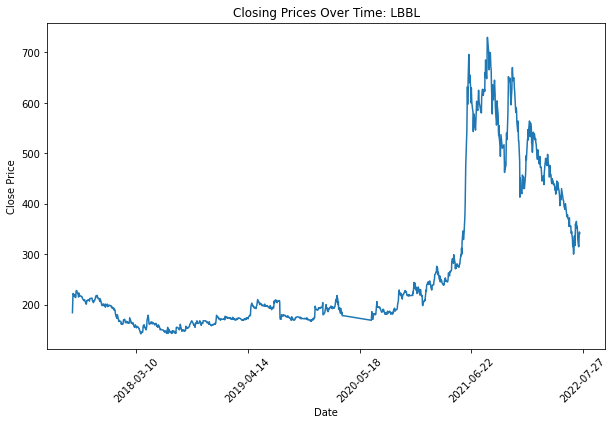



Closing time over time for: NABIL
-------------------------------


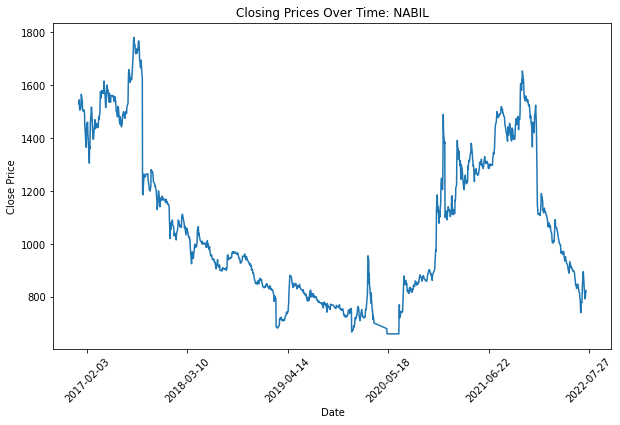



Closing time over time for: NBL
-------------------------------


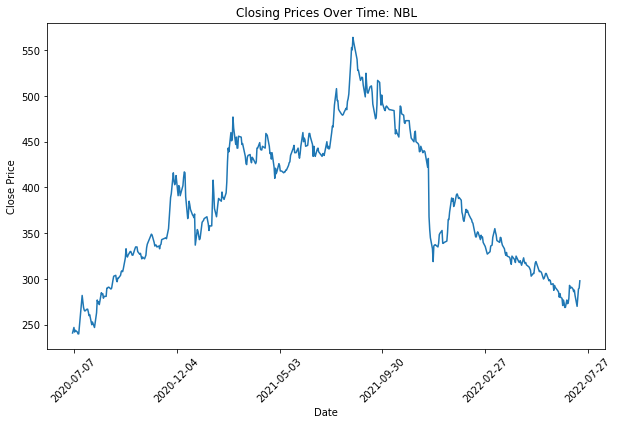



Closing time over time for: NHPC
-------------------------------


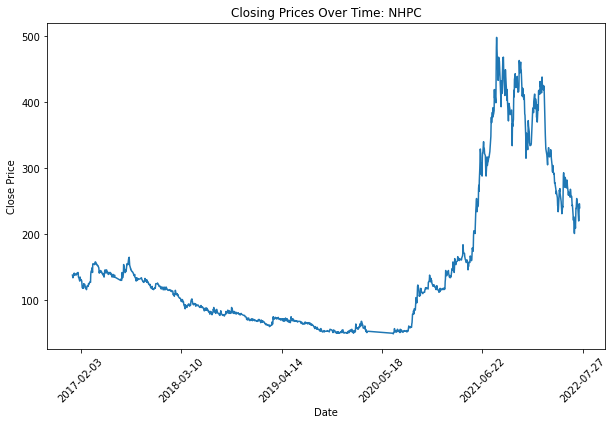



Closing time over time for: SICL
-------------------------------


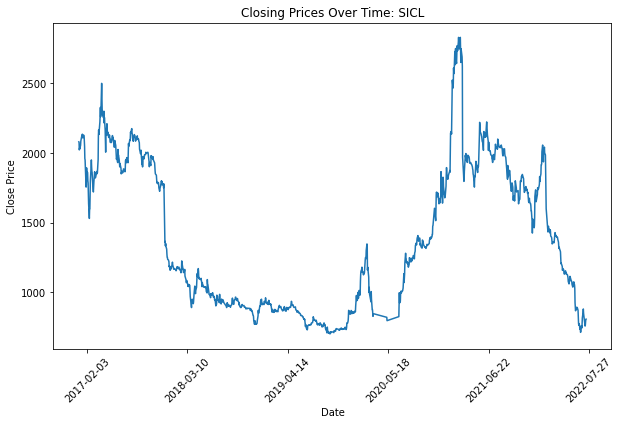

In [12]:
# Visualize the trends in 'Close' prices over time for each stocks
for symbol in unique_stocks:
    stock_data = nepse_df[nepse_df["Symbol"] == symbol]
    
    print(f"Closing time over time for: {symbol}")
    print("-------------------------------")
    
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price')
    plt.title(f'Closing Prices Over Time: {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    
    # Format the date on x-axis
    date_format = DateFormatter('%Y-%m-%d')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=6))  # Set number of x-axis ticks

    plt.xticks(rotation=45)
    plt.show()
    print("\n")

In [13]:
# list the unique scrip
scrip_list = list(nepse_df['Symbol'].unique())
print("Available Scrip are", scrip_list)

Available Scrip are ['LBBL', 'NABIL', 'NBL', 'NHPC', 'SICL']


In [14]:
# Filter data based on choice
class CustomError(Exception):
  pass

SCRIP = input("Enter the Scrip you want to analyze: ")

if SCRIP in scrip_list:
  nepse_df = nepse_df[nepse_df['Symbol'] == SCRIP]
else:
  print("Scrip is not valid")
  raise CustomError("Wrong Input")

Scrip is not valid


CustomError: Wrong Input

In [ ]:
# Perform 80 - 20 split for training and test data
values = nepse_df['Close'].values
training_data_len = math.ceil(len(values)* 0.8)

In [ ]:
df = nepse_df.copy()

# Add moving average
df['Moving_Avg'] = df['Close'].rolling(window=5).mean()

# Function to compute RSI
def compute_rsi(data, window):
    diff = data.diff()
    up_chg = 0 * diff
    down_chg = 0 * diff

    up_chg[diff > 0] = diff[ diff>0 ]
    down_chg[diff < 0] = diff[ diff < 0 ]

    up_chg_avg   = up_chg.rolling(window=window).mean()
    down_chg_avg = down_chg.rolling(window=window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

# Add RSI
df['RSI'] = compute_rsi(df['Close'], 5)
df = df.dropna()  # Drop NaN values
df.head()

,Symbol,Date,Open,High,Low,Close,percent_change,Volume,Moving_Avg,RSI
2893,NHPC,2022-07-08,246.0,248.0,236.0,238.5,-2.25,67330,235.3,48.514851
2894,NHPC,2022-07-07,251.9,259.0,243.0,244.0,-1.21,101172,234.9,48.000000
2895,NHPC,2022-07-06,250.0,255.0,238.1,247.0,0.00,172414,235.3,51.923077
2896,NHPC,2022-07-05,249.0,263.0,240.0,247.0,-0.80,183296,239.3,79.411765
2897,NHPC,2022-07-04,259.0,269.9,242.1,249.0,-1.97,290739,245.1,100.000000


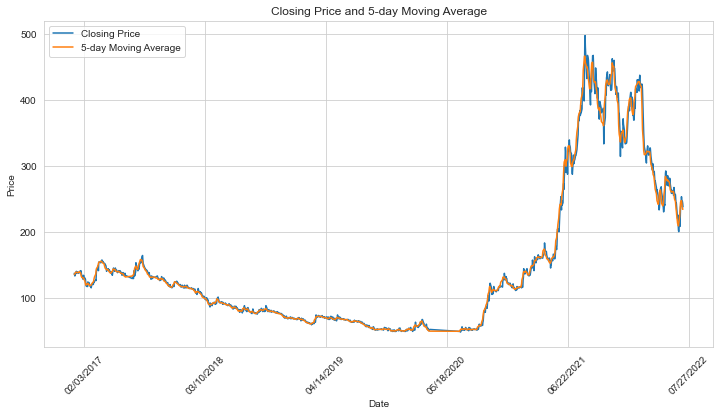

In [ ]:
# visualize moving average for the selected stock
sns.set_style('whitegrid')

# Plotting Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['Moving_Avg'], label='5-day Moving Average')
plt.title('Closing Price and 5-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')



# Format the date on x-axis
date_format = DateFormatter('%m/%d/%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=6))  # Set number of x-axis ticks

plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
# Features and target variable
features = df[['Open', 'Moving_Avg', 'RSI']]
target = df['Close']

# Split data into 80-20 for training and testing
training_data_len = int(0.8 * len(features))
train_features = features[:training_data_len]
train_target = target[:training_data_len]
test_features = features[training_data_len:]
test_target = target[training_data_len:]

# Scale the features
scaler_features = StandardScaler()
train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

# Scale the target
scaler_target = StandardScaler()
train_target_scaled = scaler_target.fit_transform(train_target.values.reshape(-1, 1))
test_target_scaled = scaler_target.transform(test_target.values.reshape(-1, 1))

# Create data structure with 5 timestamps for training and testing data
window_size = 5
x_train, y_train, x_test, y_test = [], [], [], []

for i in range(window_size, len(train_features_scaled)):
    x_train.append(train_features_scaled[i-window_size:i])
    y_train.append(train_target_scaled[i])
for i in range(window_size, len(test_features_scaled)):
    x_test.append(test_features_scaled[i-window_size:i])
    y_test.append(test_target_scaled[i])

x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)


## Build a Model



### 1. RNN Model

In [ ]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1], 3)))
rnn_model.add(Dropout(0.2, name = 'd1'))
rnn_model.add(SimpleRNN(units=75, return_sequences=False))
rnn_model.add(Dropout(0.2, name = 'd2'))
rnn_model.add(Dense(units=20))
rnn_model.add(Dense(units=1))
rnn_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
rnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 5, 50)             2700      
                                                                 
 d1 (Dropout)                (None, 5, 50)             0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 75)                9450      
                                                                 
 d2 (Dropout)                (None, 75)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                1520      
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 13691 (53.48 KB)
Trainable params: 13691

In [ ]:
epochs = 50
history = rnn_model.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/50
25/25 [==============================] - 2s 12ms/step - loss: 0.3784 - val_loss: 0.0262
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1515 - val_loss: 0.0197
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0997 - val_loss: 0.0265
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0786 - val_loss: 0.0307
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0633 - val_loss: 0.0134
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0567 - val_loss: 0.0059
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0516 - val_loss: 0.0081
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0414 - val_loss: 0.0364
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0410 - val_loss: 0.0024
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0368 - val_loss: 0.0023
Epoch 11/50
25/25 

In [ ]:
model.save_weights(f"models/{SCRIP}_RNN.h5")

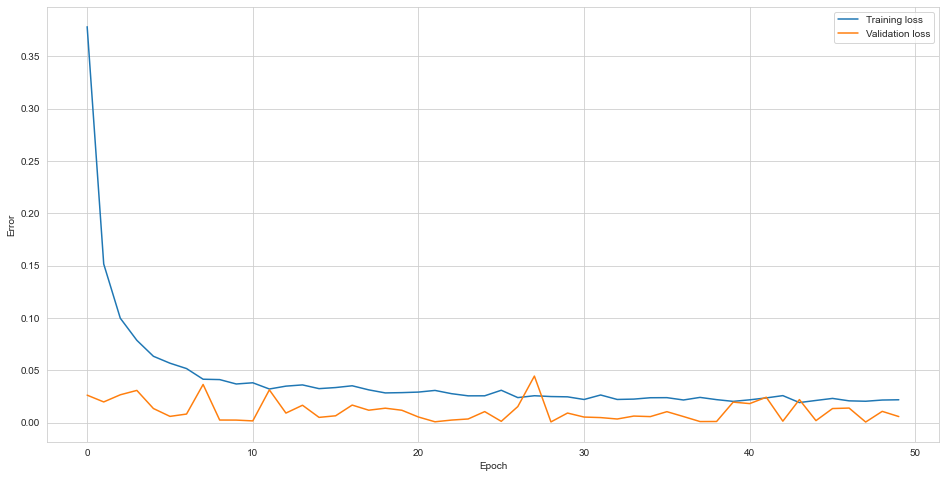

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(16,8))
  plt.plot(history.history['loss'], label='Training loss')
  plt.plot(history.history['val_loss'], label='Validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
scaler = StandardScaler()
scaled_prediction = rnn_model.predict(x_test)
predictions = scaler_target.inverse_transform(scaled_prediction)
rnn_rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("RNN RMSE:", rnn_rmse)

8/8 [==============================] - 0s 1ms/step
RNN RMSE: 139.18922513137343


In [ ]:
# data = nepse_df.filter(['Close'])
# train = data[:training_data_len]
# validation = data[training_data_len:]
# validation['Predictions'] = predictions
# plt.figure(figsize=(16,8))
# plt.title('Training on RNN Model')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.plot(train)
# plt.plot(validation[['Close', 'Predictions']])
# plt.legend(['Training', 'Validations', 'Predictions'], loc='upper right')
# plt.show()

### 2. LSTM Model

In [ ]:
# Define the RNN Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape= (x_train.shape[1], 3)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=75, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=20))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')
lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10800     
                                                                 
 dropout (Dropout)           (None, 5, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 75)             37800     
                                                                 
 dropout_1 (Dropout)         (None, 5, 75)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                25200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 20)               

In [ ]:
epochs = 50
history = model.fit(x_train, y_train, epochs = epochs, validation_split=0.2)

Epoch 1/50
25/25 [==============================] - 1s 13ms/step - loss: 0.6220 - val_loss: 0.0299
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2452 - val_loss: 0.0122
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1616 - val_loss: 0.0820
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1002 - val_loss: 0.0305
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0645 - val_loss: 0.0289
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0671 - val_loss: 0.0105
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0596 - val_loss: 0.0463
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0487 - val_loss: 0.0223
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0378 - val_loss: 0.0030
Epoch 10/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0428 - val_loss: 0.0529
Epoch 11/50
25/25 

In [ ]:
model.save_weights(f"models/{SCRIP}_LSTM.h5")

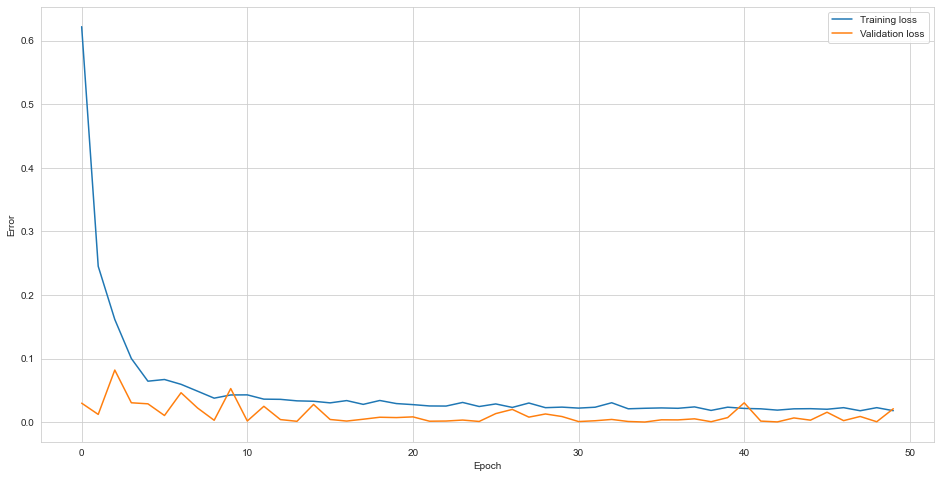

In [ ]:
plot_loss(history)

In [ ]:
scaled_prediction = lstm_model.predict(x_test)
predictions = scaler_target.inverse_transform(scaled_prediction)
lstm_rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("LSTM RMSE:", lstm_rmse)

8/8 [==============================] - 0s 3ms/step
LSTM RMSE: 155.20342664336752


In [ ]:
# data = nepse_df.filter(['Close'])
# train = data[:training_data_len]
# validation = data[training_data_len:]
# validation['Predictions'] = predictions
# plt.figure(figsize=(16,8))
# plt.title('Model')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.plot(train)
# plt.plot(validation[['Close', 'Predictions']])
# plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
# plt.show()

In [ ]:
if rnn_rmse > lstm_rmse:
  print("RNN works better than LSTM for", SCRIP)
elif rnn_rmse < lstm_rmse:
  print("LSTM works better than RNN for", SCRIP)
else:
  print("The performance of RNN and LSTM are same.")

LSTM works better than RMSE for NHPC


## 3. GRU Model


In [ ]:
# Define the GRU Model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 3)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(units=75, return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(units=20))
gru_model.add(Dense(units=1))
gru_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

# Train the model
gru_history = gru_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
25/25 [==============================] - 3s 27ms/step - loss: 0.1129 - val_loss: 0.0014
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0385 - val_loss: 0.0011
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0323 - val_loss: 0.0016
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0279 - val_loss: 0.0012
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0256 - val_loss: 9.1169e-04
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.0062
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0218 - val_loss: 0.0037
Epoch 8/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.0053
Epoch 9/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0214 - val_loss: 0.0060
Epoch 10/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0229 - val_loss: 0.0064
Epoch 11/50
25

In [ ]:
gru_model.save_weights(f"models/{SCRIP}_GRU.h5")

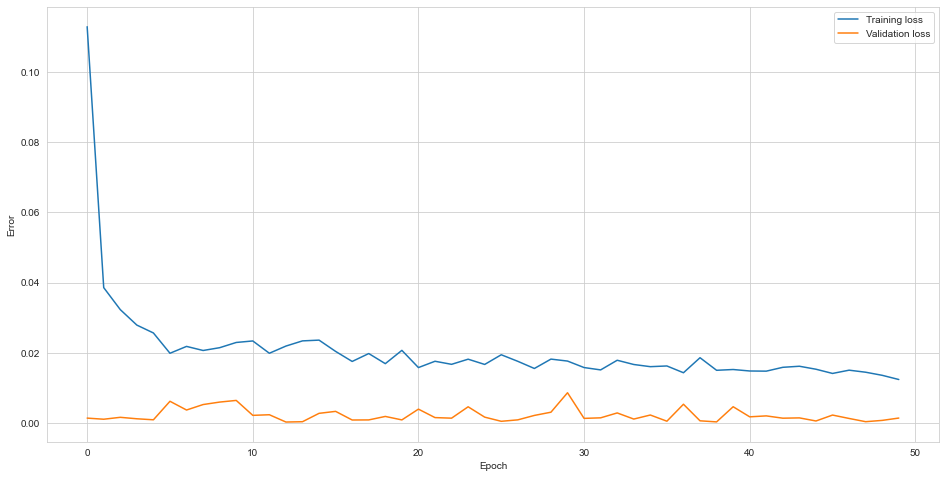

In [ ]:
plot_loss(gru_history)

In [ ]:
scaled_prediction = gru_model.predict(x_test)
predictions = scaler_target.inverse_transform(scaled_prediction)
gru_rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("GRU RMSE:", gru_rmse)

8/8 [==============================] - 1s 2ms/step
GRU RMSE: 129.21907603921758


In [ ]:
if gru_rmse < lstm_rmse and gru_rmse < rnn_rmse:
    print("GRU works better than LSTM and RNN for", SCRIP)
elif lstm_rmse < gru_rmse and lstm_rmse < rnn_rmse:
    print("LSTM works better than GRU and RNN for", SCRIP)
elif rnn_rmse < gru_rmse and rnn_rmse < lstm_rmse:
    print("RNN works better than GRU and LSTM for", SCRIP)
else:
    print("The performance of GRU, LSTM, and RNN are similar for", SCRIP)

GRU works better than LSTM and RNN for NHPC


## QNA/FAQ

**Q: what is the signifance of RMSE in this project?**

**A:** RMSE (Root Mean Squared Error) is a commonly used metric to evaluate the accuracy of predictive models. It provides a clear understanding of the model's performance, with lower values indicating better predictive accuracy. It measures the average magnitude of errors between predicted and actual values. Lower RMSE values indicate better predictive performance.

**Q: How do you compare the performance of different models in this project?**

**A:** The project compares the RMSE values of different models (RNN, LSTM, GRU) on the test dataset. The model with the lowest RMSE is considered to have the best predictive performance.

**Q: What is RSI and Moving Average**

**A:**

**RSI (Relative Strength Index)**

RSI is a momentum indicator that ranges from 0 to 100. It helps identify overbought (above 70) and oversold (below 30) market conditions, which can suggest potential reversals in price trends.

**Moving Average**

In stock analysis, a moving average calculates the average price of a stock over a specific time period. This smooths out daily price fluctuations, revealing the general trend. It aids in predicting a stock's future direction by focusing on the broader trend rather than short-term ups and downs. This is valuable for making informed decisions about potential price movements.

**ReLu vs Sigmoid**


ReLU (Rectified Linear Activation) and Sigmoid are activation functions in neural networks. ReLU outputs the input if it's positive, aiding in efficient computation and combating vanishing gradients. It's used in hidden layers for diverse tasks. Sigmoid transforms inputs to a range between 0 and 1, making it suitable for binary classification and probability estimates. However, it's prone to vanishing gradients and is often chosen for binary classification outputs. The choice depends on the task and network structure.

**Outliers vs anamolies**

Outliers are data points that are far from the typical values in a dataset, while anomalies are unexpected deviations from the usual pattern. Outliers can be part of the same distribution, while anomalies often indicate rare events or errors requiring special attention.